# House Price- Prediction Regression Model

### Introdction to data
- In this project, we have built machine learning model to predict the house price.
- This project is very helpful for the real estate market.
- Our project is helpful for property buyer and property sealer both.
- Linear Regression algorithm is used to create a model with the accuracy score.

### Problem statement
- Price of real estate properties are sophisticatedly linked with our property.
- Despite this, we do not have accurate measures of house price based on the vast amount of the data available.
- Proper and justified price of properties can bring in a lot of transparency  and trust back to a real estate industry, which is very important for the customers. 

### Objective of project
- The goal of this project is to predict house price in Alley, USA based on some feature such as sales price, location, size, area, parking lot, number of bedrooms and bathrooms, etc.
- Washington house price dataset is used to create the model.
- We are using Machine Learning Algorithm to create a prediction model.
- Multiple Linear Regression Algorithm is used to train and test the model in our project.

## Importing libraries

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from math import sqrt

In [2]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

In [3]:
df_trn=pd.read_csv('train.csv')
df_tst=pd.read_csv('test.csv')

In [4]:
df_trn.shape

(1460, 81)

In [5]:
df_tst.shape

(1459, 80)

In [6]:
df_trn.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [7]:
df_tst.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal


In [8]:
df_trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df_tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
df_trn.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
808,809,80,RL,85.0,13400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SLvl,5,5,1966,1966,Gable,CompShg,VinylSd,VinylSd,BrkFace,1047.0,TA,TA,CBlock,TA,TA,Av,ALQ,516,BLQ,128,380,1024,GasA,TA,Y,SBrkr,1086,0,0,1086,1,0,1,0,3,1,TA,6,Typ,1,Gd,Attchd,1966.0,RFn,2,484,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,6,2006,WD,Normal,159950
901,902,20,RL,64.0,8712,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1957,2000,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,Mn,BLQ,860,Unf,0,132,992,GasA,TA,Y,SBrkr,1306,0,0,1306,1,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1968.0,Unf,1,756,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,153000
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,Typ,0,NaN,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
19,20,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1958,1965,Hip,CompShg,BrkFace,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,504,Unf,0,525,1029,GasA,TA,Y,SBrkr,1339,0,0,1339,0,0,1,0,3,1,TA,6,Min1,0,NaN,Attchd,1958.0,Unf,1,294,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,COD,Abnorml,139000
275,276,50,RL,55.0,7264,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,7,7,1925,2007,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasW,Gd,N,SBrkr,952,596,0,1548,0,0,2,1,3,1,Ex,5,Typ,0,NaN,Detchd,1978.0,Unf,2,672,TA,TA,Y,74,0,0,0,144,0,NaN,NaN,NaN,0,10,2009,WD,Normal,205000
1369,1370,20,RL,48.0,10635,Pave,NaN,IR2,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2003,2003,Hip,CompShg,VinylSd,VinylSd,BrkFace,171.0,Gd,TA,PConc,Gd,TA,Av,BLQ,370,GLQ,972,315,1657,GasA,Ex,Y,SBrkr,1668,0,0,1668,1,0,2,0,3,1,Gd,8,Typ,1,TA,Attchd,2003.0,Fin,2,502,TA,TA,Y,0,262,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,232000
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
417,418,70,RL,86.0,22420,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Feedr,Norm,1Fam,2Story,6,6,1918,1950,Hip,CompShg,Wd Sdng,Stucco,None,0.0,TA,TA,BrkTil,Gd,TA,No,BLQ,1128,Unf,0,242,1370,GasW,TA,N,FuseA,1370,1254,0,2624,1,0,2,1,4,1,TA,10,Typ,1,Gd,Detchd,1918.0,Unf,3,864,TA,TA,N,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,239000
1148,1149,50,RM,NaN,5700,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,7,7,1926,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,572,572,GasA,TA,Y,SBrkr,572,539,0,1111,0,0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1982.0,Unf,1,288,TA,TA,Y,0,0,176,0,0,0,NaN,NaN,NaN,0,8,2008,WD,Normal,116900
503,504,20,RL,100.0,15602,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,7,8,1959,1997,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1247,Unf,0,254,1501,GasA,TA

In [11]:
df_tst.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1306,2767,90,RL,60.0,8544,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1950,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Fa,N,FuseF,1040,0,0,1040,0.0,0.0,2,0,2,2,TA,6,Typ,0,NaN,Detchd,1950.0,Unf,2.0,400.0,TA,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,12,2006,WD,Normal
253,1714,20,FV,68.0,8736,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2003,2004,Gable,CompShg,VinylSd,Wd Shng,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,771.0,ALQ,360.0,422.0,1553.0,GasA,Ex,Y,SBrkr,1553,0,0,1553,1.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2003.0,RFn,2.0,588.0,TA,TA,Y,192,88,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
596,2057,20,RL,63.0,7584,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Artery,Norm,1Fam,1Story,5,5,1953,1953,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,88.0,TA,TA,CBlock,TA,TA,No,LwQ,531.0,Unf,0.0,505.0,1036.0,GasA,Ex,Y,SBrkr,1036,0,0,1036,0.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1953.0,RFn,1.0,312.0,TA,TA,Y,120,24,0,0,0,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal
94,1555,20,RL,100.0,15263,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1Story,5,5,1959,1959,Gable,CompShg,HdBoard,HdBoard,BrkFace,90.0,TA,TA,CBlock,Gd,TA,No,Rec,766.0,Unf,0.0,656.0,1422.0,GasA,Gd,Y,SBrkr,1675,0,0,1675,0.0,0.0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1959.0,Unf,1.0,365.0,TA,TA,Y,0,132,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
387,1848,20,RL,NaN,9000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,SBrkr,660,0,0,660,0.0,0.0,1,0,2,1,Fa,5,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,100,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
56,1517,85,RL,75.0,11380,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,SFoyer,6,8,1966,2008,Gable,CompShg,HdBoard,HdBoard,BrkFace,216.0,TA,TA,CBlock,TA,TA,Gd,GLQ,944.0,Unf,0.0,136.0,1080.0,GasA,Gd,Y,SBrkr,1128,0,0,1128,1.0,0.0,1,0,2,1,Gd,5,Typ,1,Gd,Attchd,1966.0,Unf,1.0,315.0,TA,TA,Y,238,0,0,0,0,0,NaN,NaN,Shed,1500,1,2010,WD,Normal
453,1914,30,C (all),60.0,10200,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,4,6,1925,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,572.0,572.0,GasA,Fa,N,FuseP,572,0,0,572,0.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1940.0,Unf,1.0,200.0,TA,TA,N,0,0,72,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
654,2115,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,7,1940,1989,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,521.0,Unf,0.0,460.0,981.0,GasA,Ex,Y,SBrkr,1014,658,0,1672,0.0,0.0,1,1,3,1,Gd,6,Typ,1,Gd,Detchd,1940.0,Unf,1.0,240.0,TA,TA,Y,0,11,0,0,0,0,NaN,GdPrv,NaN,0,7,2008,WD,Normal
86,1547,50,RM,53.0,6360,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,5,6,1942,1950,Gable,CompShg,MetalSd,MetalSd,Stone,300.0,TA,TA,CBlock,TA,TA,No,Rec,360.0,LwQ,159.0,316.0,835.0,GasA,TA,Y,FuseA,955,498,0,1453,0.0,0.0,1,1,3,1,Gd,7,Min2,2,Fa,Detchd,1942.0,Unf,1.0,240.0,TA,TA,Y,0,0,35,0,148,0,NaN,NaN,NaN,0,3,2010,WD,Normal
843,2304,60,RL,92.0,10732,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2006,2007,Gable

In [12]:
df_trn.isnull().sum().sum()

6965

In [13]:
df_tst.isnull().sum().sum()

7000

In [16]:
df_trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

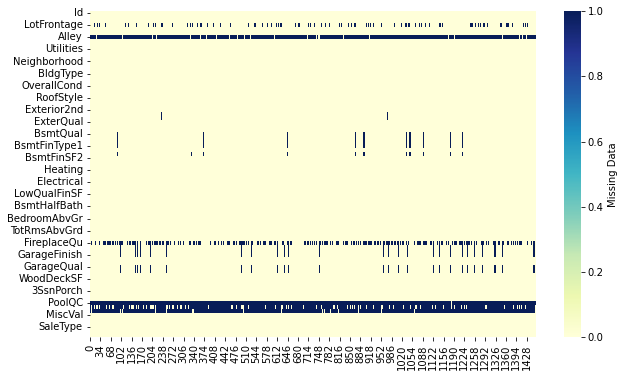

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df_trn.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

<AxesSubplot:>

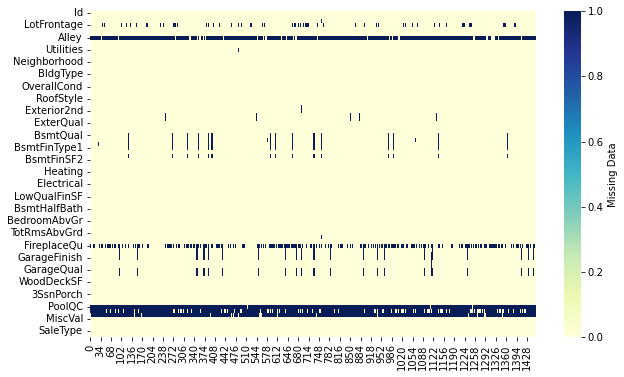

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df_tst.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

<AxesSubplot:>

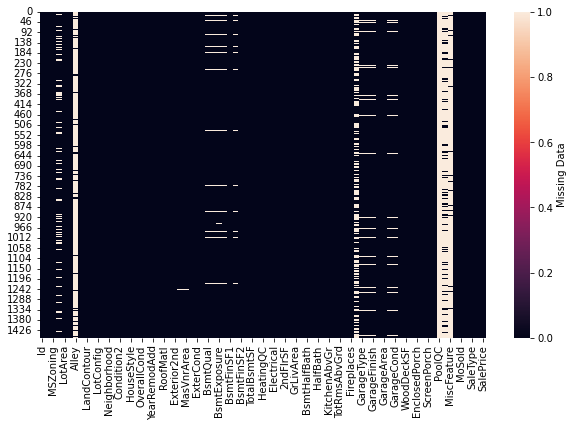

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df_trn.isna(),
            cbar_kws={'label': 'Missing Data'})

<AxesSubplot:>

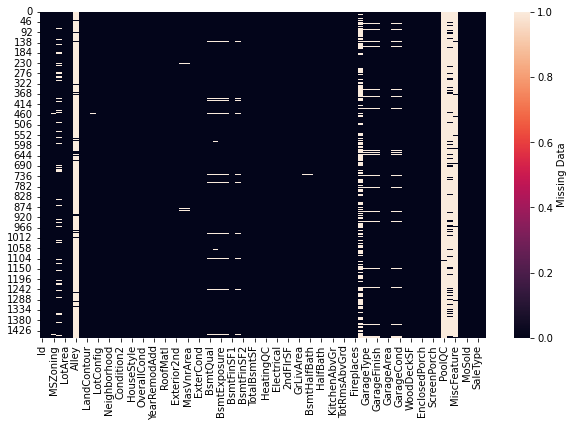

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df_tst.isna(),
            cbar_kws={'label': 'Missing Data'})

In [19]:
df_trn.isnull().sum()/len(df_trn)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

In [20]:
df_tst.isnull().sum()/len(df_tst)*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
Street            0.000000
Alley            92.666210
LotShape          0.000000
LandContour       0.000000
Utilities         0.137080
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.068540
Exterior2nd       0.068540
MasVnrType        1.096642
MasVnrArea        1.028101
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          3.015764
BsmtCond          3.084304
BsmtExposure      3.015764
BsmtFinType1      2.878684
BsmtFinSF1        0.068540
BsmtFinType2      2.878684
BsmtFinSF2        0.068540
B

In [21]:
df_trn.isna().mean().round(4) * 100

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

In [22]:
df_tst.isna().mean().round(4) * 100

Id                0.00
MSSubClass        0.00
MSZoning          0.27
LotFrontage      15.56
LotArea           0.00
Street            0.00
Alley            92.67
LotShape          0.00
LandContour       0.00
Utilities         0.14
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.07
Exterior2nd       0.07
MasVnrType        1.10
MasVnrArea        1.03
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          3.02
BsmtCond          3.08
BsmtExposure      3.02
BsmtFinType1      2.88
BsmtFinSF1        0.07
BsmtFinType2      2.88
BsmtFinSF2        0.07
BsmtUnfSF         0.07
TotalBsmtSF       0.07
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.00
1stFlrSF   

In [23]:
df_trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [24]:
df_tst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

<AxesSubplot:>

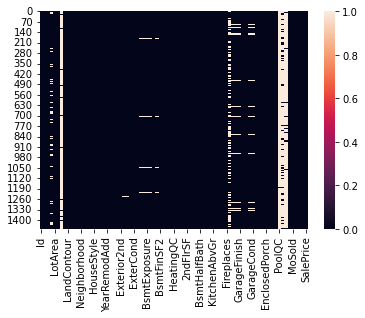

In [25]:
import seaborn as sn
sn.heatmap(df_trn.isnull())

<AxesSubplot:>

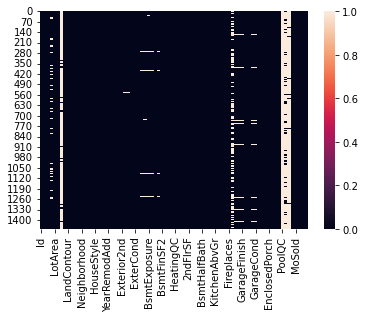

In [26]:
import seaborn as sn
sn.heatmap(df_tst.isnull())

<AxesSubplot:>

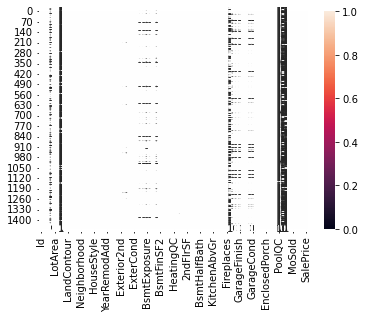

In [27]:
import seaborn as sn

sn.heatmap(df_trn.isnull(),annot=True)

<AxesSubplot:>

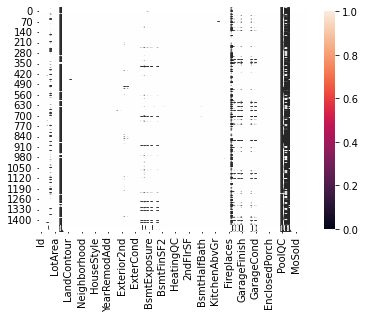

In [28]:
import seaborn as sn

sn.heatmap(df_tst.isnull(),annot=True)

In [29]:
df_trn.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

### Start again

In [30]:
cols=df_trn.columns

<AxesSubplot:xlabel='YrSold', ylabel='count'>

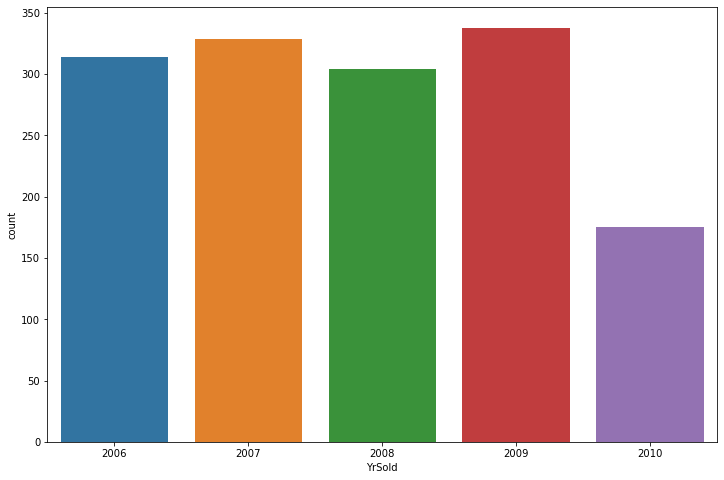

In [31]:
plt.figure(figsize=(12,8))
sns.countplot(x='YrSold',data=df_trn)

In [32]:
df_trn['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

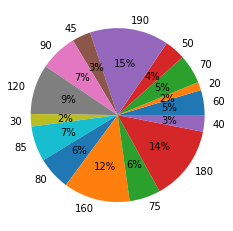

In [33]:
plt.pie(df_trn['MSSubClass'].unique(), labels = df_trn['MSSubClass'].unique(), autopct='%.0f%%')

plt.show()

In [ ]:
plt.pie(df_trn['OverallCond'].unique(), labels = df_trn['OverallCond'].unique(), autopct='%.0f%%')

plt.show()

In [ ]:
sns.swarmplot(x='LotConfig',y='SalePrice',data=df_trn)

In [ ]:
sns.boxenplot(data=df_trn,x='LotConfig',y='SalePrice')


### end of eda section

In [ ]:
from sklearn import preprocessing
for i in df_trn.columns:
    if df_trn[i].dtype=='object':
            label_encoder=preprocessing.LabelEncoder()
            df_trn[i]=label_encoder.fit_transform(df_trn[i])

In [ ]:
from sklearn import preprocessing
for i in df_tst.columns:
    if df_tst[i].dtype=='object':
            label_encoder=preprocessing.LabelEncoder()
            df_tst[i]=label_encoder.fit_transform(df_tst[i])

In [34]:
for i in df_trn.columns:
    if df_trn[i].dtypes == 'object':
        df_trn[i].fillna(df_trn[i].mode()[0], inplace=True)
    else:
        df_trn[i].fillna(df_trn[i].median(), inplace=True)
#print(df_trn)
df_trn.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
440,441,20,RL,105.0,15431,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,Gd,MnPrv,Shed,0,4,2009,WD,Normal,555000
1429,1430,20,RL,69.0,12546,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1981,1981,Gable,CompShg,MetalSd,MetalSd,BrkFace,310.0,Gd,Gd,CBlock,Gd,TA,No,BLQ,678,Unf,0,762,1440,GasA,Ex,Y,SBrkr,1440,0,0,1440,0,0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1981.0,Fin,2,467,TA,TA,Y,0,0,99,0,0,0,Gd,MnPrv,Shed,0,4,2007,WD,Normal,182900
1208,1209,20,RL,70.0,7763,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1962,1980,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Rec,504,BLQ,108,319,931,GasA,TA,Y,SBrkr,1283,0,0,1283,1,0,1,0,3,1,TA,6,Typ,0,Gd,Detchd,1980.0,Unf,2,506,TA,TA,Y,0,0,0,0,0,0,Gd,MnPrv,Shed,0,10,2008,WD,Normal,140000
1053,1054,20,RL,68.0,8562,Pave,Grvl,Reg,Lvl,AllPub,Inside,Mod,Edwards,Norm,Norm,1Fam,1Story,5,6,1957,2002,Hip,CompShg,HdBoard,HdBoard,Stone,145.0,TA,TA,CBlock,TA,TA,Av,Rec,383,Unf,0,833,1216,GasA,Ex,Y,FuseA,1526,0,0,1526,0,0,1,0,4,1,TA,7,Min2,1,Gd,Basment,1957.0,Unf,1,364,TA,TA,Y,116,78,0,0,0,0,Gd,MnPrv,Shed,0,5,2010,WD,Normal,144500
682,683,120,RL,69.0,2887,Pave,Grvl,Reg,HLS,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1Story,6,5,1996,1997,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,Gd,TA,Mn,GLQ,1003,Unf,0,288,1291,GasA,Ex,Y,SBrkr,1291,0,0,1291,1,0,1,0,2,1,Gd,6,Typ,1,Gd,Attchd,1996.0,Unf,2,431,TA,TA,Y,307,0,0,0,0,0,Gd,MnPrv,Shed,0,11,2008,WD,Normal,173000
601,602,50,RM,50.0,9000,Pave,Grvl,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,6,1937,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Gd,PConc,TA,TA,No,Unf,0,Unf,0,780,780,GasA,TA,Y,SBrkr,780,595,0,1375,0,0,1,1,3,1,Gd,6,Typ,1,Gd,Detchd,1979.0,Unf,1,544,TA,TA,P,0,162,0,0,126,0,Gd,MnPrv,Shed,0,12,2007,WD,Normal,141000
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,Gd,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,Gd,MnPrv,Shed,0,7,2008,WD,Normal,40000
1070,1071,20,RL,72.0,10152,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1956,1956,Hip,CompShg,MetalSd,MetalSd,BrkFace,120.0,TA,TA,CBlock,TA,TA,No,BLQ,586,Unf,0,462,1048,GasA,TA,Y,SBrkr,1048,0,0,1048,1,0,1,0,3,1,TA,6,Typ,0,Gd,Attchd,1956.0,Unf,1,286,TA,TA,Y,0,20,0,0,192,0,Gd,MnPrv,Shed,0,6,2007,WD,Normal,135000
649,650,180,RM,21.0,1936,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,131,GLQ,499,0,630,GasA,Gd,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,TA,3,Typ,0,Gd,Attchd,1980.0,Unf,0,0,TA,TA,Y,0,0,0,0,0,0,Gd,MnPrv,Shed,0,12,2007,WD,Normal,84500
170,171,50,RM,69.0,12358,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Fin,5,6,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA

In [35]:
for i in df_tst.columns:
    if df_tst[i].dtypes == 'object':
        df_tst[i].fillna(df_tst[i].mode()[0], inplace=True)
    else:
        df_tst[i].fillna(df_tst[i].median(), inplace=True)
#print(df_trn)
df_tst.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1200,2661,20,RL,121.0,13758,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,430.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1232.0,Unf,0.0,560.0,1792.0,GasA,Ex,Y,SBrkr,1792,0,0,1792,1.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,925.0,TA,TA,Y,204,49,0,0,0,0,Ex,MnPrv,Shed,0,3,2006,New,Partial
800,2261,120,RL,38.0,4740,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1988,1988,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,CBlock,Gd,TA,Gd,GLQ,248.0,Unf,0.0,918.0,1166.0,GasA,Gd,Y,SBrkr,1179,0,0,1179,1.0,0.0,2,0,2,1,TA,5,Typ,0,Gd,Attchd,1988.0,RFn,2.0,480.0,TA,TA,Y,0,108,0,0,135,0,Ex,MnPrv,Shed,0,10,2007,WD,Normal
1261,2722,60,RL,72.0,8640,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,2Story,5,5,1968,1968,Gable,CompShg,HdBoard,HdBoard,BrkFace,300.0,TA,TA,CBlock,Gd,Fa,Mn,ALQ,361.0,Rec,483.0,56.0,900.0,GasA,Ex,Y,SBrkr,884,886,0,1770,1.0,0.0,1,1,4,1,TA,7,Typ,0,Gd,Attchd,1968.0,RFn,2.0,530.0,TA,TA,Y,0,60,0,0,270,0,Ex,MnPrv,Shed,455,6,2006,WD,Normal
7,1468,60,RL,63.0,8402,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,Ex,MnPrv,Shed,0,5,2010,WD,Normal
1140,2601,120,RM,62.0,6710,Pave,Grvl,IR1,Lvl,AllPub,FR3,Gtl,Mitchel,Norm,Norm,TwnhsE,SFoyer,6,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,134.0,TA,TA,PConc,Ex,TA,Av,Rec,16.0,GLQ,904.0,0.0,920.0,GasA,Ex,Y,SBrkr,936,0,0,936,2.0,0.0,0,1,0,1,TA,3,Typ,0,Gd,Attchd,1996.0,Fin,2.0,460.0,TA,TA,Y,0,40,0,0,0,0,Ex,MnPrv,Shed,0,6,2007,WD,Normal
937,2398,45,RL,85.0,12172,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1.5Unf,5,7,1940,1996,Gable,CompShg,Wd Sdng,HdBoard,None,0.0,TA,TA,PConc,TA,TA,No,LwQ,130.0,Rec,259.0,433.0,822.0,GasA,TA,Y,SBrkr,908,0,0,908,0.0,0.0,1,0,2,1,TA,4,Typ,0,Gd,Attchd,1975.0,Unf,2.0,512.0,TA,TA,Y,284,24,0,0,192,0,Ex,MnPrv,Shed,0,10,2007,WD,Normal
1270,2731,30,RL,60.0,8550,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,8,1934,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,574.0,Unf,0.0,242.0,816.0,GasA,Ex,Y,SBrkr,816,0,0,816,1.0,0.0,1,0,2,1,TA,4,Typ,1,Fa,Attchd,1949.0,Unf,1.0,240.0,TA,TA,Y,228,0,40,0,0,0,Ex,MnPrv,Shed,0,7,2006,WD,Normal
713,2174,60,RL,67.0,10400,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,227.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1257.0,1257.0,GasA,Ex,Y,SBrkr,1290,871,0,2161,0.0,0.0,2,1,3,1,Gd,8,Typ,1,TA,Attchd,2001.0,RFn,2.0,570.0,TA,TA,Y,0,84,0,0,0,0,Ex,MnPrv,Shed,0,6,2008,WD,Normal
797,2258,20,RL,67.0,9556,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1992,1993,Gable,CompShg,HdBoard,HdBoard,BrkFace,52.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1168.0,1168.0,GasA,Gd,Y,SBrkr,1187,0,0,1187,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Gd,Attchd,1992.0,RFn,2.0,420.0,TA,TA,Y,0,21,0,0,0,0,Ex,MnPrv,Shed,0,8,2007,WD,Normal
1041,2502,50,RL,60.0,11100,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards

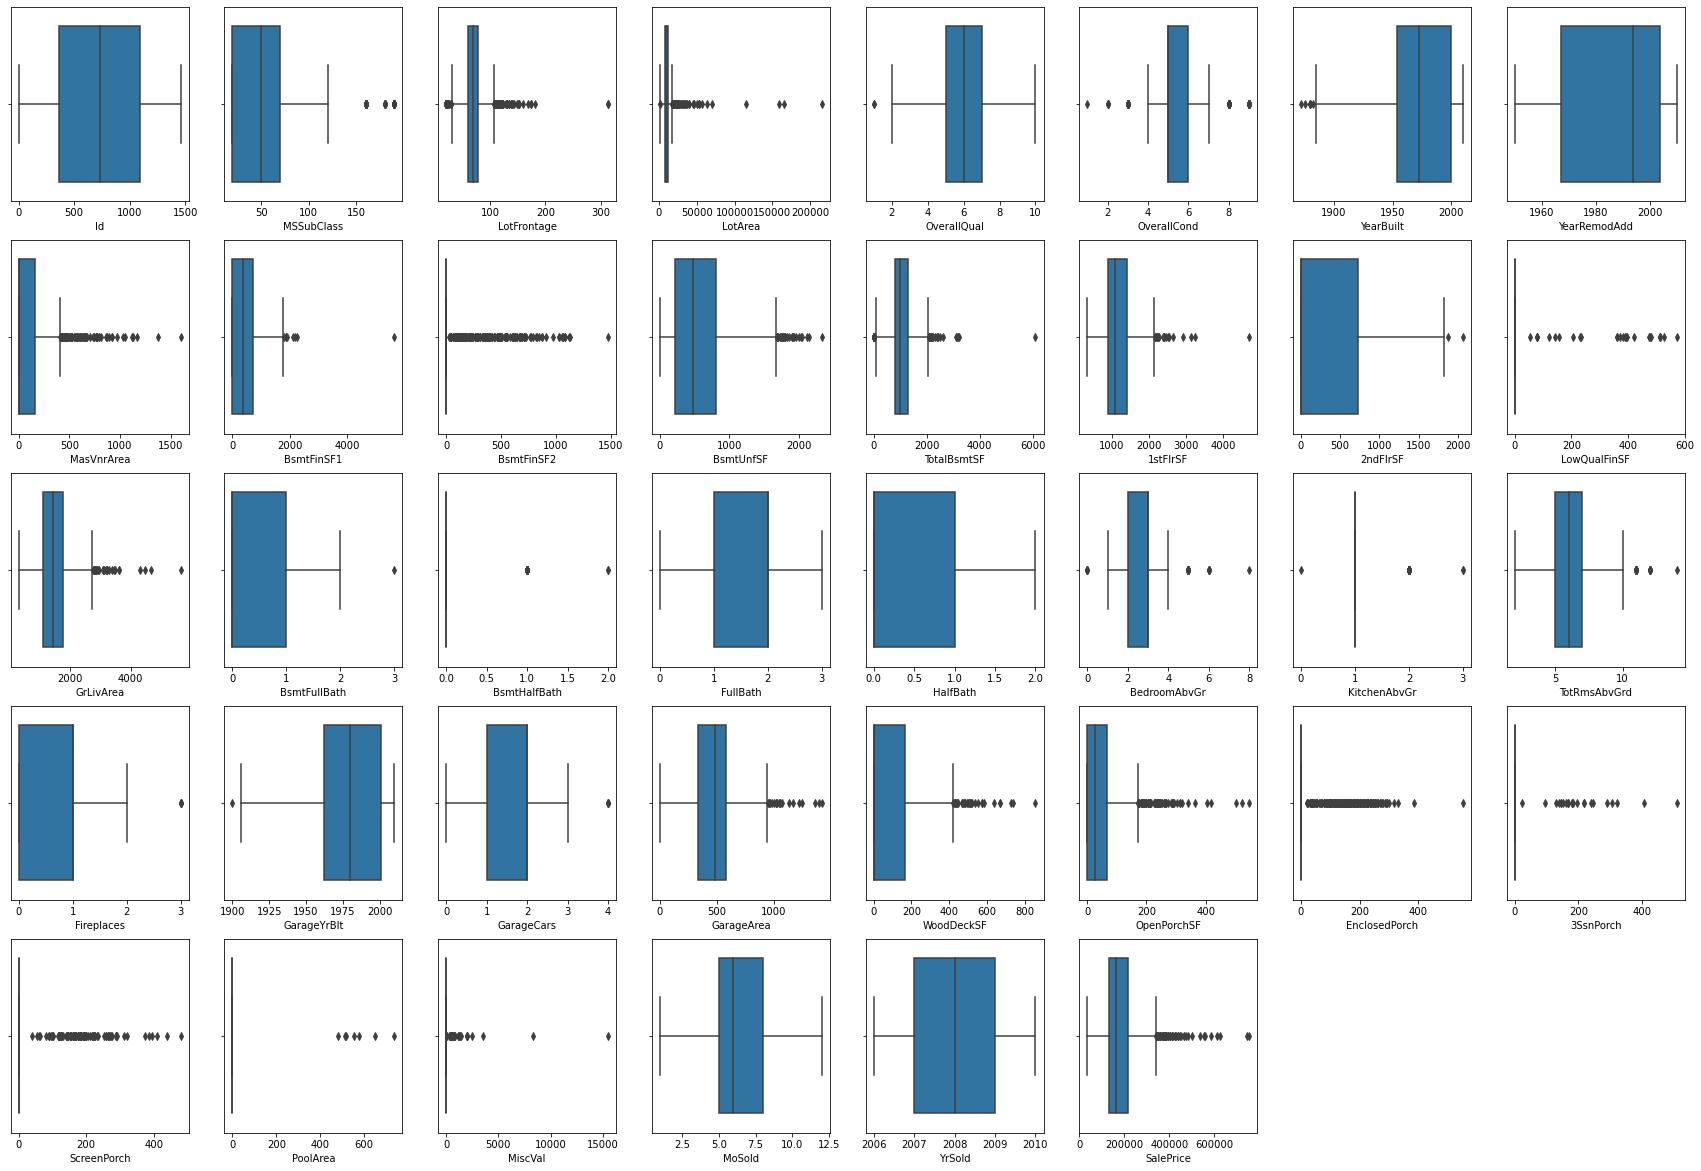

In [36]:
count=1
plt.subplots(figsize=(30,25))
for i in df_trn.columns:
    if df_trn[i].dtypes!='object':
        plt.subplot(6,8,count)
        sns.boxplot(x=df_trn[i])
        count+=1

plt.show()

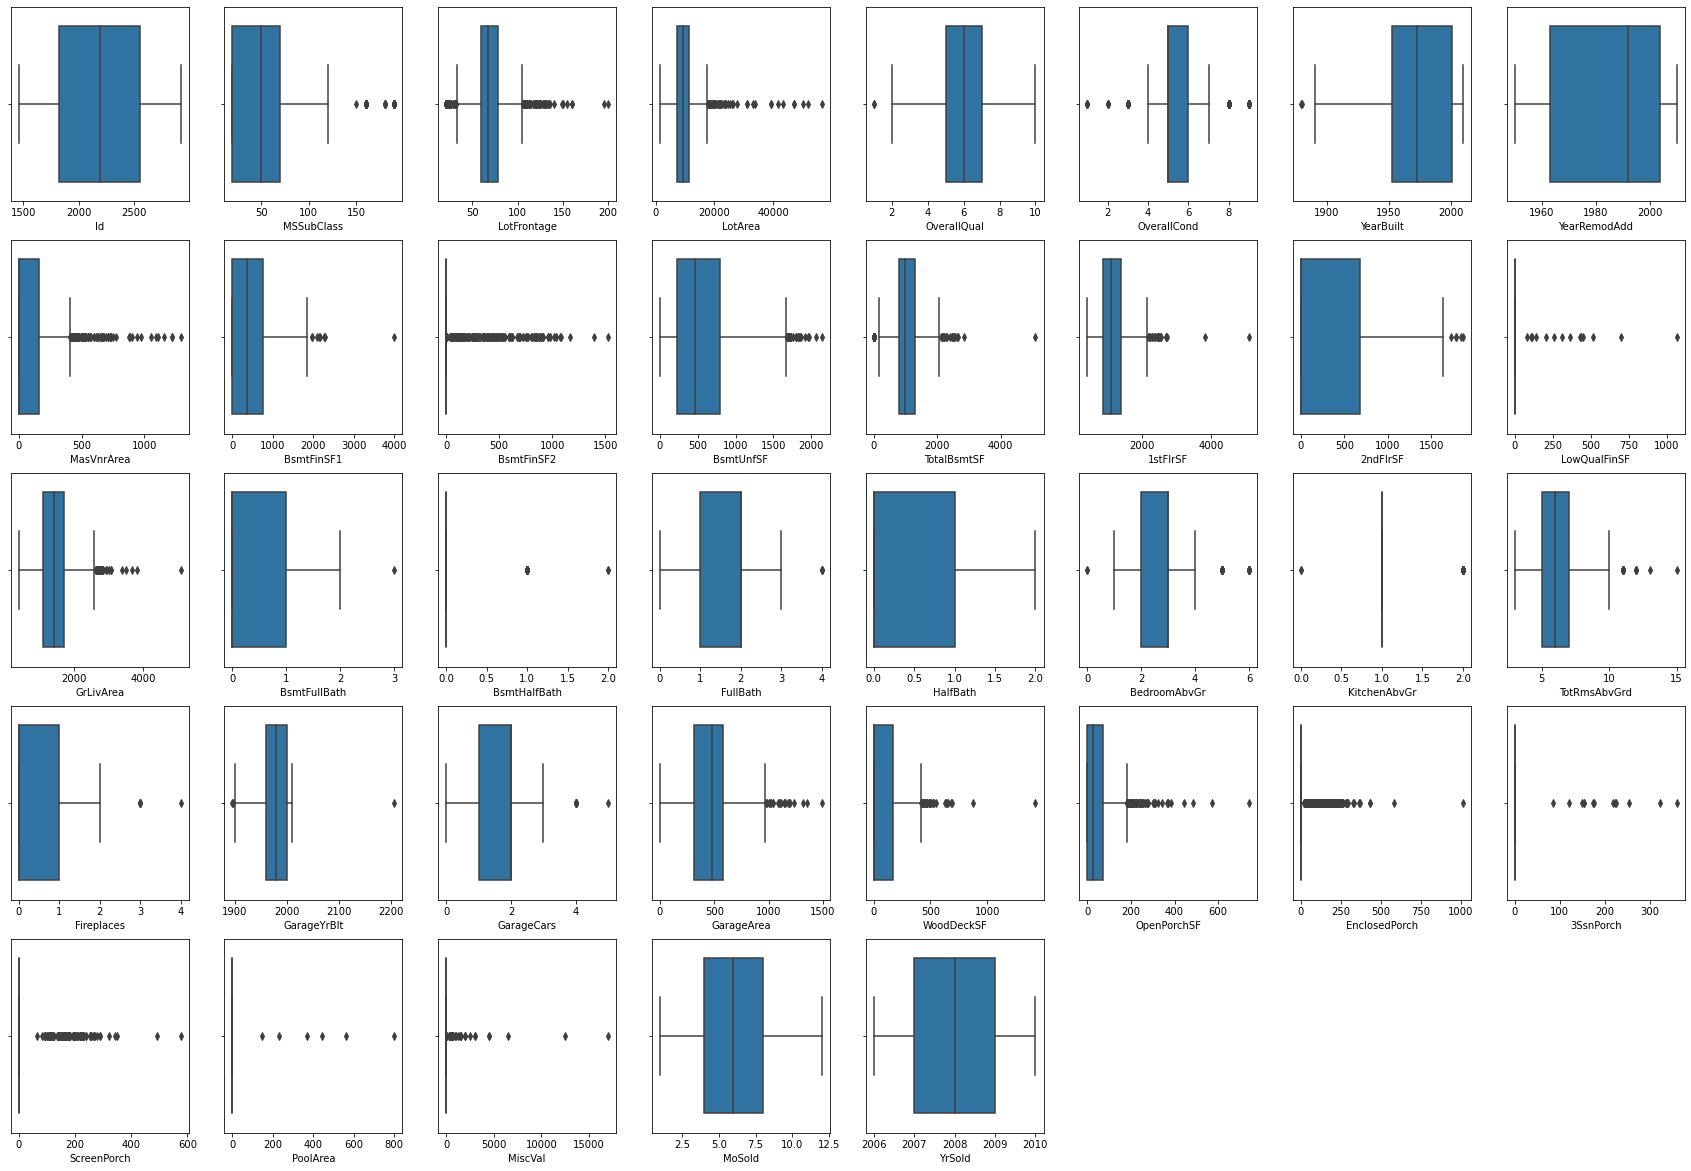

In [37]:
count=1
plt.subplots(figsize=(30,25))
for i in df_tst.columns:
    if df_tst[i].dtypes!='object':
        plt.subplot(6,8,count)
        sns.boxplot(x=df_tst[i])
        count+=1

plt.show()

In [38]:
df_trn = df_trn.drop(["Id"], axis=1)

In [39]:
df_trn.isna().sum().sum()

0

In [40]:
df_tst = df_tst.drop(["Id"], axis=1)

In [41]:
df_tst.isna().sum().sum()

0

In [42]:
def out_to_null(data=df_trn):
    for x in df_trn.columns:
        if df_trn[x].dtypes ==np.float64:
            #In the given column the outliers will convert into null values
            print('\n\n Column name:', x)
            q1=data[x].quantile(0.25)
            print('Quatile, Q1: ',q1)
            q3=data[x].quantile(0.75)
            print('Quatile, Q3: ',q3)
            iqr=q3-q1
            print('Inter Quatile Range, IQR: ',iqr)
            ulp=q3+(1.5*iqr)
            print('Upper Limit Point, ULP: ',ulp)
            llp=q1-(1.5*iqr)
            print('Lower Limit Point, LLP: ',llp)
            print(np.where(ulp))
            #here the values which are above upperlimit and below lowerlimt are replaced with null values          
            data[x]=np.where(data[x] > ulp,np.nan,
                                   np.where(data[x] < llp,np.nan ,data[x]))
            print('\n\nin the given column the outliers are replaced with null values\n')

In [43]:
out_to_null(df_trn)



 Column name: LotFrontage
Quatile, Q1:  60.0
Quatile, Q3:  79.0
Inter Quatile Range, IQR:  19.0
Upper Limit Point, ULP:  107.5
Lower Limit Point, LLP:  31.5
(array([0], dtype=int64),)


in the given column the outliers are replaced with null values



 Column name: MasVnrArea
Quatile, Q1:  0.0
Quatile, Q3:  164.25
Inter Quatile Range, IQR:  164.25
Upper Limit Point, ULP:  410.625
Lower Limit Point, LLP:  -246.375
(array([0], dtype=int64),)


in the given column the outliers are replaced with null values



 Column name: GarageYrBlt
Quatile, Q1:  1962.0
Quatile, Q3:  2001.0
Inter Quatile Range, IQR:  39.0
Upper Limit Point, ULP:  2059.5
Lower Limit Point, LLP:  1903.5
(array([0], dtype=int64),)


in the given column the outliers are replaced with null values



In [44]:
df_trn.shape

(1460, 80)

In [45]:
df_trn.isnull().sum().sum()

205

In [46]:
for i in df_trn.columns:
    if df_trn[i].dtypes == 'object':
        df_trn[i].fillna(df_trn[i].mode()[0], inplace=True)
    else:
        df_trn[i].fillna(df_trn[i].median(), inplace=True)
#print(df_trn)
df_trn.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
991,70,RM,69.0,17671,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,1Fam,2Story,8,9,1882,1986,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,No,BLQ,216,Unf,0,700,916,GasA,Gd,Y,SBrkr,916,826,0,1742,0,0,1,1,4,1,Gd,8,Typ,1,Gd,Attchd,1925.0,Unf,2,424,TA,TA,P,0,169,0,0,0,0,Gd,MnPrv,Shed,0,11,2009,WD,Normal,168000
1091,160,FV,69.0,2160,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,7,5,1999,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,212.0,Gd,TA,PConc,Gd,TA,No,BLQ,510,Unf,0,90,600,GasA,Ex,Y,SBrkr,624,628,0,1252,1,0,2,1,2,1,Gd,4,Typ,0,Gd,Detchd,1999.0,Unf,2,462,TA,TA,Y,0,48,0,0,0,0,Gd,MnPrv,Shed,0,3,2008,WD,Normal,160000
214,60,RL,69.0,10900,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,1Fam,2Story,6,7,1977,1977,Gable,CompShg,HdBoard,HdBoard,BrkFace,153.0,TA,TA,CBlock,Gd,TA,No,GLQ,378,Unf,0,311,689,GasA,Ex,Y,SBrkr,689,703,0,1392,0,0,1,1,3,1,TA,6,Typ,0,Gd,Attchd,1977.0,Fin,1,299,TA,TA,Y,0,36,0,0,0,0,Gd,MnPrv,Shed,450,3,2010,WD,Normal,161750
1262,50,RL,69.0,11250,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,4,5,1957,1989,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,Av,Unf,0,Unf,0,1104,1104,GasA,Ex,Y,FuseA,1104,684,0,1788,1,0,1,0,5,1,TA,8,Min2,2,TA,Attchd,1957.0,Unf,1,304,TA,TA,Y,120,0,0,0,0,0,Gd,MnPrv,Shed,0,11,2009,WD,Normal,161500
1140,20,RL,60.0,7350,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1951,1951,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Mn,ALQ,852,Unf,0,100,952,GasA,TA,Y,SBrkr,952,0,0,952,1,0,1,0,2,1,TA,4,Typ,0,Gd,Detchd,1988.0,Unf,2,840,TA,TA,Y,0,0,0,0,0,0,Gd,MnPrv,Shed,0,6,2008,COD,Abnorml,139000
472,180,RM,35.0,3675,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SLvl,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,80.0,TA,TA,PConc,Gd,TA,Gd,GLQ,459,Unf,0,88,547,GasA,Ex,Y,SBrkr,1072,0,0,1072,1,0,1,0,2,1,TA,5,Typ,0,Gd,Basment,2005.0,RFn,2,525,TA,TA,Y,0,28,0,0,0,0,Gd,MnPrv,Shed,0,6,2008,WD,Normal,148000
758,160,FV,69.0,2280,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,7,5,1999,1999,Gable,CompShg,MetalSd,MetalSd,BrkFace,360.0,TA,TA,PConc,Gd,TA,No,ALQ,549,Unf,0,195,744,GasA,Gd,Y,SBrkr,757,744,0,1501,0,0,2,1,3,1,TA,6,Typ,0,Gd,Detchd,1999.0,Unf,2,440,TA,TA,Y,0,0,0,0,0,0,Gd,MnPrv,Shed,0,8,2008,WD,Normal,179400
814,50,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,5,7,1918,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,686,686,GasW,Gd,Y,SBrkr,686,564,0,1250,0,1,1,1,3,1,Fa,7,Typ,0,Gd,Detchd,1955.0,Unf,1,280,TA,TA,P,207,0,96,0,0,0,Gd,MnPrv,Shed,0,7,2006,WD,Normal,116000
783,85,RL,69.0,9101,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,6,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,104.0,TA,Gd,PConc,Gd,TA,Av,GLQ,1097,Unf,0,0,1097,GasA,Ex,Y,SBrkr,1110,0,0,1110,1,0,1,0,1,1,Gd,4,Typ,1,TA,Attchd,1978.0,Fin,2,602,TA,TA,Y,303,30,0,0,0,0,Gd,MnPrv,Shed,0,7,2009,WD,Normal,165500
1436,20,RL,60.0,9000,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,TA,TA,No,ALQ,616,Unf,0,248,864,GasA,TA,Y,SBrk

In [47]:
df_trn.isnull().sum().sum()

0

In [48]:
df_trn.isna().sum().sum()

0

In [49]:
df_trn.to_csv('test_2.csv',index=False)

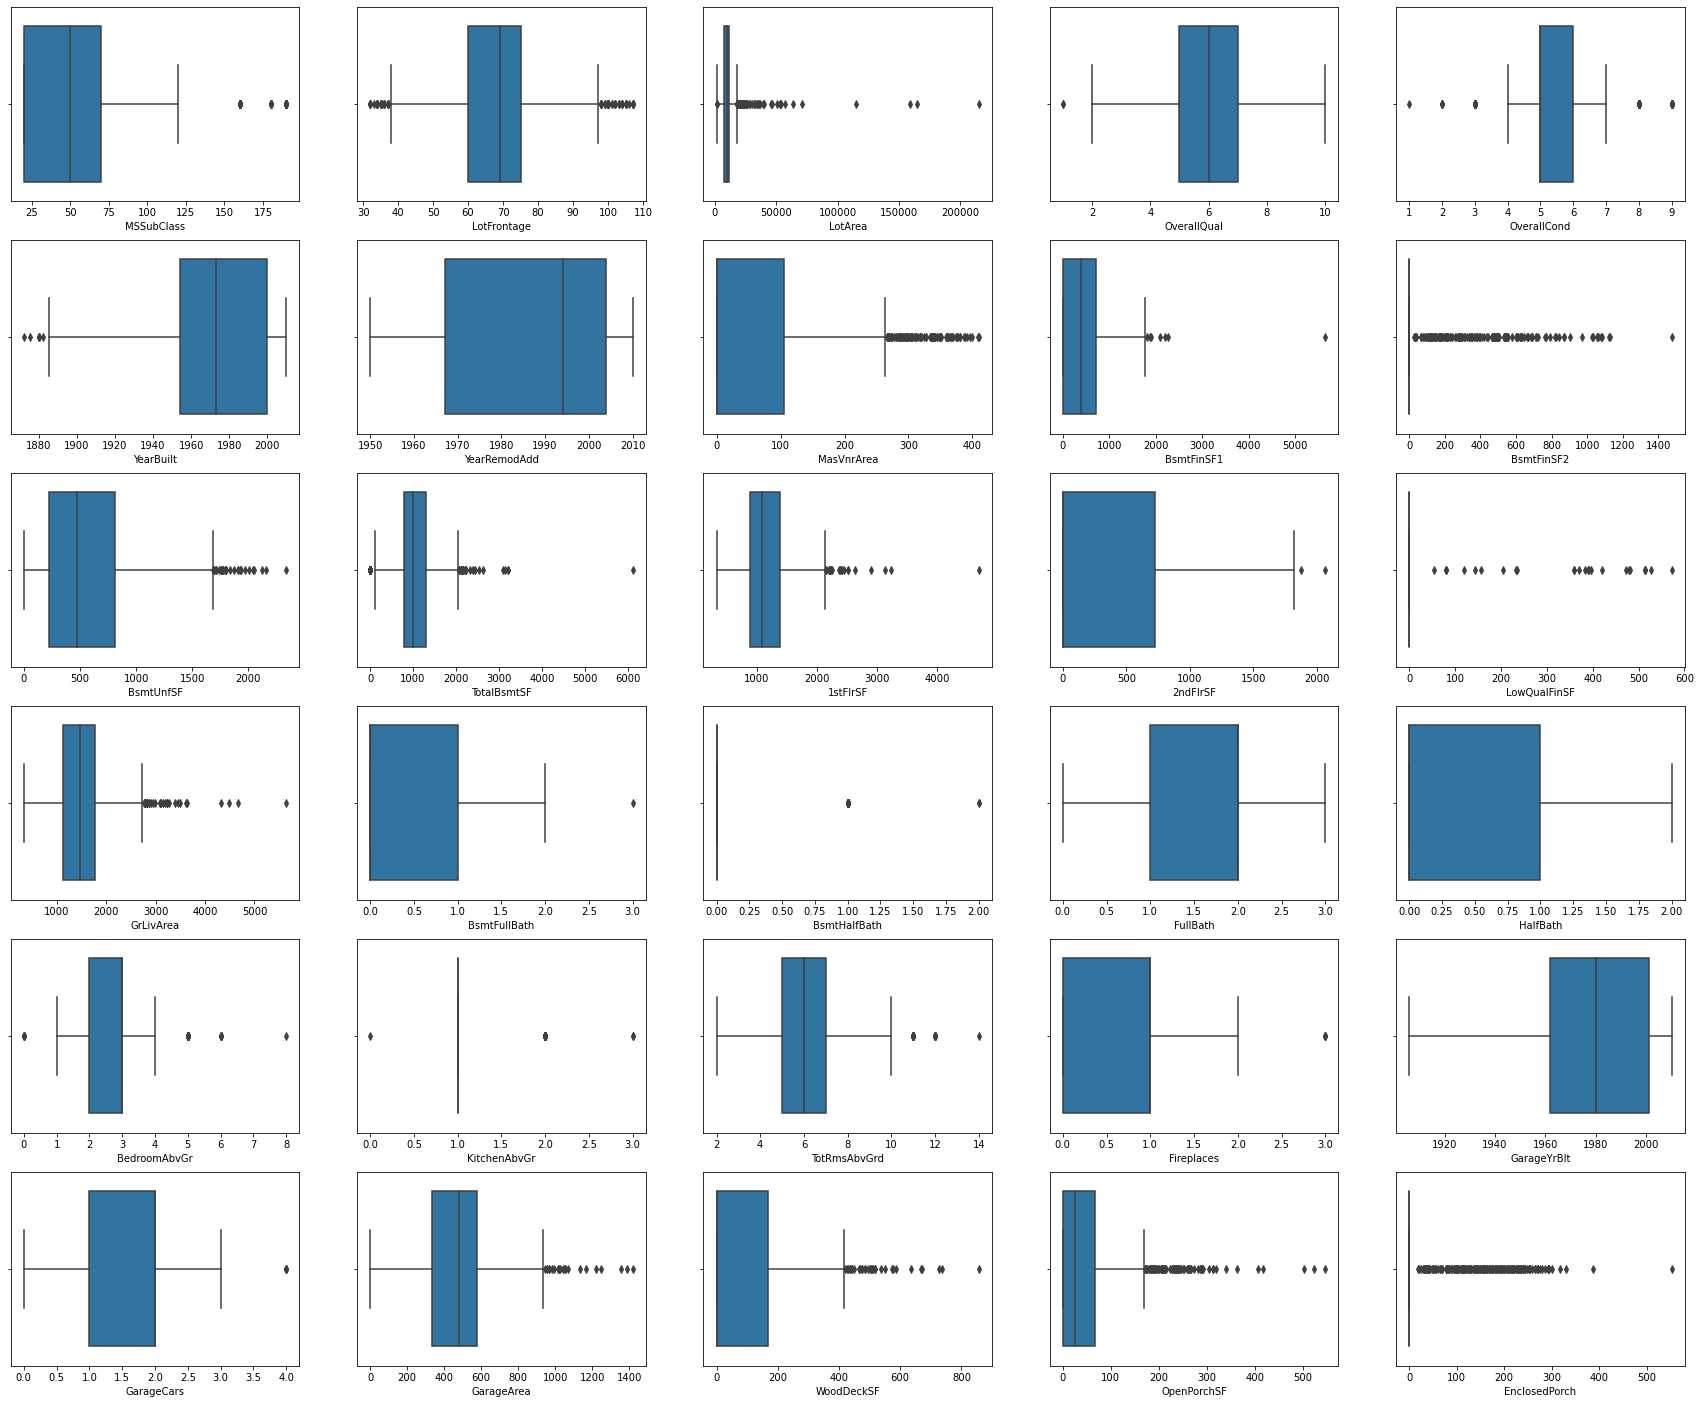

In [50]:
count=1
plt.subplots(figsize=(30,25))
for i in df_trn.columns:
    if df_trn[i].dtypes!='object':
        plt.subplot(6,5,count)
        sns.boxplot(x=df_trn[i])
        if count>=30:
            break
        count+=1

plt.show()

### get dummies for one hot encoding


In [51]:
df_trn = pd.get_dummies(df_trn, drop_first = True)
df_trn.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,1,0,1,0,0,0,1,0,0,1

In [52]:
df_trn.shape

(1460, 246)

In [ ]:
df_trn.isna().sum()

In [ ]:
df_trn.sample(5)

In [ ]:
df_trn.describe()

### univariate study

C:\Users\Gunjan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


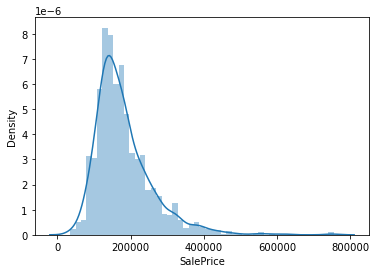

In [53]:
sns.distplot(df_trn['SalePrice']);

In [ ]:
sns.histplot(df_trn['SalePrice']);

In [ ]:
var = 'TotalBsmtSF'

df_trn.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### observation - it has good/strong relationship

In [ ]:
var = 'OverallQual'

plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=df_trn)
fig.axis(ymin=0, ymax=800000);

### higher quality higher price

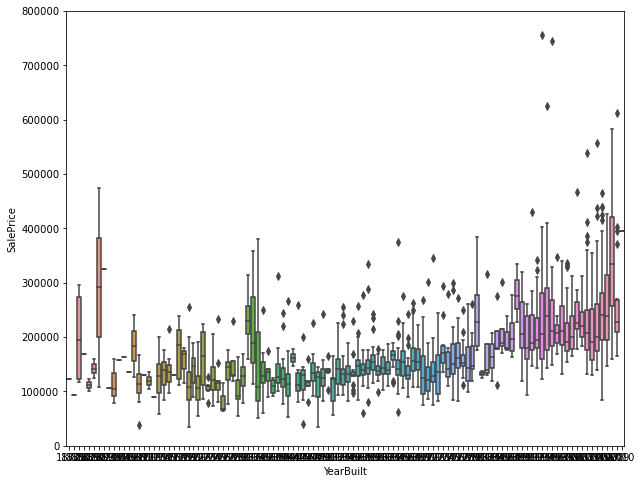

In [54]:
var = 'YearBuilt'

plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=df_trn)
fig.axis(ymin=0, ymax=800000);

In [ ]:
sns.boxplot(x=df_trn['PoolQC'],y=df_trn['SalePrice'], data=df_trn)
plt.show()

### reg

In [55]:
df_trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 246 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(34), uint8(209)
memory usage: 720.1 KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [ ]:
X = df_trn.drop(["SalePrice"], axis=1)
y = df_trn["SalePrice"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(X_train, y_train)
y_pred_mlr= mlr.predict(X_val)
y_pred_mlr


r2_mlr =r2_score(y_val,y_pred_mlr)
print('r2_score:',r2_mlr*100)

In [ ]:
plt.scatter(y_val, y_pred_mlr, c = 'blue')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_val, y_pred_mlr)
mae = mean_absolute_error(y_val,y_pred_mlr)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_10_results  = np.mean(cross_val_score(mlr , X, y, cv=10))

cv_10_results

In [ ]:
cv_10_results  = cross_val_score(mlr , X, y, cv=10)
print(cv_10_results  )

In [ ]:
print(cv_5_results  )
print(cv_10_results)
print(cv_20_results )

### using XGBoost Regession

In [ ]:
model = XGBRegressor(n_estimators=1600, max_depth=16, learning_rate=0.01, subsample=0.5,
                     colsample_bytree=0.75, missing=-999, random_state=2020, n_jobs=10)

model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_val, y_val)], verbose=1)

In [ ]:
y.sample(10)

In [ ]:
predictions = model.predict(X_val)
mse = mean_squared_error(y_val,predictions)
#score = score_dataset(X_val, y_val, model)
r2 = metrics.r2_score(y_val, predictions)
print(f"Root Mean Squared Error: {np.sqrt(mse)}")
print(f"R2 Score : {r2}")

### Again all models simple

In [ ]:
X=df_trn.drop('SalePrice',axis=1)
y=df_trn['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [24]:

def train_models(X_train, y_train):
    tree = DecisionTreeRegressor(max_features=75,max_depth=4, random_state = 0)
    tree.fit(X_train, y_train)
    y_pred_tree = tree.predict(X_test)

    rf = RandomForestRegressor(n_estimators = 100,max_features =75, random_state = 0)
    rf.fit(X_train, y_train)
    y_pred_rf= rf.predict(X_test)
    
    svr= SVR(kernel = 'rbf')
    svr.fit(X_train, y_train)
    y_pred_svr = svr.predict(X_test)
    
    svr_l= SVR(kernel = 'linear')
    svr_l.fit(X_train, y_train)
    y_pred_svr_linear = svr_l.predict(X_test)
    
    knn = neighbors.KNeighborsRegressor()
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    
    meanAbErr_tree= metrics.mean_absolute_error(y_test, y_pred_tree)
    meanSqErr_tree= metrics.mean_squared_error(y_test, y_pred_tree)
    rootMeanSqErr_tree= np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree))
    
    meanAbErr_rf= metrics.mean_absolute_error(y_test, y_pred_rf)
    meanSqErr_rf= metrics.mean_squared_error(y_test, y_pred_rf)
    rootMeanSqErr_rf= np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
  
    meanAbErr_knn = metrics.mean_absolute_error(y_test, y_pred_knn)
    meanSqErr_knn = metrics.mean_squared_error(y_test, y_pred_knn)
    rootMeanSqErr_knn= np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)) 

    meanAbErr_svr = metrics.mean_absolute_error(y_test, y_pred_svr_linear)
    meanSqErr_svr = metrics.mean_squared_error(y_test, y_pred_svr_linear)
    rootMeanSqErr_svr= np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr_linear)) 

    print('[1]Decision Tree Training Accurancy: ', r2_score(y_test,y_pred_tree))
    print('Mean Absolute Error:', meanAbErr_tree)
    print('Mean Square Error:', meanSqErr_tree)
    print('Root Mean Square Error:', rootMeanSqErr_tree)
    print('\t')
    print('[2]RandomForestRegressor Training Accurancy: ',r2_score(y_test,y_pred_rf))
    print('Mean Absolute Error:', meanAbErr_rf)
    print('Mean Square Error:', meanSqErr_rf)
    print('Root Mean Square Error:', rootMeanSqErr_rf)
    print('\t')    
    print('[3]SupportvectorRegression Accuracy(rbf): ', r2_score(y_test,y_pred_svr))
    print('\t')
    print('[4]SupportvectorRegression Accuracy(linear): ', r2_score(y_test,y_pred_svr_linear))
    print('Mean Absolute Error:', meanAbErr_svr)
    print('Mean Square Error:', meanSqErr_svr)
    print('Root Mean Square Error:', rootMeanSqErr_svr)
    print('\t')
    print('[5]knn Training Accurancy: ', r2_score(y_test,y_pred_knn))
    print('Mean Absolute Error:', meanAbErr_knn)
    print('Mean Square Error:', meanSqErr_knn)
    print('Root Mean Square Error:', rootMeanSqErr_knn)
    print('\t')

In [ ]:

train_models(X_train, y_train)

In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  
mlr.fit(X_train, y_train)
y_pred_mlr= mlr.predict(X_test)
y_pred_mlr


r2_mlr =r2_score(y_test,y_pred_mlr)
print('r2_score:',r2_mlr*100)

### ansemble model ->

In [ ]:
df_tst=pd.read_csv('test.csv')

In [ ]:
df_tst.shape

In [ ]:
df_tst.sample(5)

In [ ]:
df_tst.isnull().sum().sort_values(ascending=False)

In [ ]:
df_tst.isnull().sum()/len(df_trn)*100

In [ ]:
for i in df_tst.columns:
    if df_tst[i].dtypes == 'object':
        df_tst[i].fillna(df_tst[i].mode()[0], inplace=True)
    else:
        df_tst[i].fillna(df_tst[i].median(), inplace=True)
#print(df_trn)
df_tst.sample(10)

In [ ]:
df_tst.isnull().sum().sum()

In [ ]:
def out_to_null(data=df_tst):
    for x in df_trn.columns:
        if df_tst[x].dtypes ==np.float64:
            #In the given column the outliers will convert into null values
            print('\n\n Column name:', x)
            q1=data[x].quantile(0.25)
            print('Quatile, Q1: ',q1)
            q3=data[x].quantile(0.75)
            print('Quatile, Q3: ',q3)
            iqr=q3-q1
            print('Inter Quatile Range, IQR: ',iqr)
            ulp=q3+(1.5*iqr)
            print('Upper Limit Point, ULP: ',ulp)
            llp=q1-(1.5*iqr)
            print('Lower Limit Point, LLP: ',llp)
            print(np.where(ulp))
            #here the values which are above upperlimit and below lowerlimt are replaced with null values          
            data[x]=np.where(data[x] > ulp,np.nan,
                                   np.where(data[x] < llp,np.nan ,data[x]))
            print('\n\nin the given column the outliers are replaced with null values\n')

In [ ]:
out_to_null(df_tst)

In [ ]:
df_tst.isnull().sum().sum()

In [ ]:
for i in df_tst.columns:
    if df_tst[i].dtypes == 'object':
        df_tst[i].fillna(df_tst[i].mode()[0], inplace=True)
    else:
        df_tst[i].fillna(df_tst[i].median(), inplace=True)
#print(df_trn)
df_tst.sample(10)

In [ ]:
df_tst.isnull().sum().sum()

In [ ]:
df_tst = pd.get_dummies(df_tst, drop_first = True)
df_tst.head()

In [ ]:
df_tst.shape

In [ ]:
df_tst = df_tst.drop(["Id"], axis=1)

In [ ]:
df_tst=pd.read_csv('test_2.csv')

In [ ]:
df_tst.shape

In [ ]:
final_df=pd.concat([df_trn,df_tst],axis=0)


In [ ]:
final_df.shape


In [ ]:
final_df['SalePrice']


In [ ]:
final_df = pd.get_dummies(final_df, drop_first = True)
final_df.head()

In [ ]:
final_df.shape

In [ ]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [ ]:
final_df.shape


In [ ]:
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]

In [ ]:
df_Test.drop(['SalePrice'],axis=1)

In [ ]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [ ]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()  

# split as in 46
#mlr.fit(df_Train, df_Test)

#train on top 1460 split x train .............
#predict on dow 1460 
y_pred_mlr= mlr.predict(df_Test)
y_pred_mlr